## Chapter 3. Dictionaries and sets

* Module namespaces, class and instance attribute, function&nbsp;keyword arguments는 딕셔너리 형태로 구현됨

* 딕셔너리와 세트는 해시테이블의 중요 요소이므로 함께 다룰 예정.

### Generic mapping type

In [4]:
from collections import abc
my_dict = {}
isinstance(my_dict,abc.Mapping) # abc.Mapping은 딕셔너리 타입

True

In [9]:
# 딕셔너리 생성 방법
a = dict(one = 1, two = 2, three = 3)
b = {'one':1,'two':2,'three':3}
c = dict(zip(['one','two','three'],[1,2,3]))
d = dict([('two',2),('one',1),('three',3)]) # 굳이?
e = dict({'three':3,'one':1,'two':2}) # 굳이?
a==b==c==d==e

True

### dict comprehensions

In [23]:
DIAL_CODES = [
(86, 'China'),
(91, 'India'),
(1, 'United States'),
(62, 'Indonesia'),
(55, 'Brazil'),
(92, 'Pakistan'),
(880, 'Bangladesh'),
(234, 'Nigeria'),
(7, 'Russia'),
(81, 'Japan'),]
country_code = {country: code for code, country in DIAL_CODES} # country를 key로
print(country_code)
{code: country.upper() for country, code in country_code.items() if code < 65}

{'China': 86, 'India': 91, 'United States': 1, 'Indonesia': 62, 'Brazil': 55, 'Pakistan': 92, 'Bangladesh': 880, 'Nigeria': 234, 'Russia': 7, 'Japan': 81}


{1: 'UNITED STATES', 62: 'INDONESIA', 55: 'BRAZIL', 7: 'RUSSIA'}

### Overview of common mapping methods

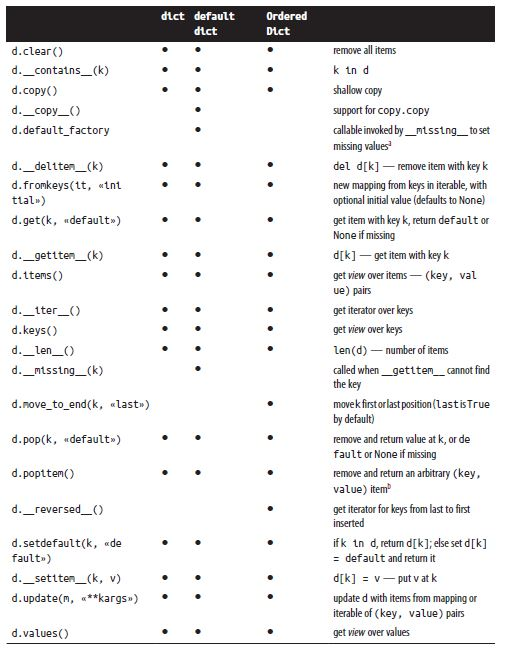

In [25]:
from IPython.display import Image
Image("dict 메서드.JPG")

### Handling missing keys with setdefault

In [27]:
import sys
import re # 정규표현식 모듈

WORD_RE = re.compile('\w+') # 패턴 객체 반환

index = {}
with open(sys.argv[1], encoding='utf-8') as fp:
    for line_no, line in enumerate(fp,1): # 1부터 시작
        for match in WORD_RE.finditer(line):
            word = match.group()
            column_no = match.start() + 1
            location = (line_no, column_no)
            occurences = index.get(word,[])
            occurences.append(location)
            index[word] = occurrences
for word in sorted(index, key=str.upper):
    print(word,index[word])

FileNotFoundError: [Errno 2] No such file or directory: '-f'

In [34]:
import sys
import re

WORD_RE = re.compile('\w+')
index = {}
#with open(sys.argv[1], encoding='utf-8') as fp:
print(sys.argv, sys.argv[1])    

['C:\\Users\\Owner\\Anaconda3\\lib\\site-packages\\ipykernel_launcher.py', '-f', 'C:\\Users\\Owner\\AppData\\Roaming\\jupyter\\runtime\\kernel-dc3d94e0-dd8e-41c9-8921-3c1f60cda2be.json'] -f


### The__missing__method

In [37]:
class StrKeyDict0(dict): # dict 상속
    def __missing__(self,key): 
        if isinstance(key,str):
            raise KeyError(key)
        return self[str(key)]
    
    def get(self,key,default=None):
        try:
            return self[key]
        except KeyError:
            return default
    def __contains__(self, key):
        return key in self.key() or str(key) in self.keys()

In [61]:
from collections import OrderedDict

my_odict = {1:'하나',2:'둘'}
my_odict[3] = '셋'
a = my_odict.popitem()
a

(3, '셋')

### 집합이론

In [50]:
from dis import dis
dis('{1}')
dis('set([1])')

  1           0 LOAD_CONST               0 (1)
              2 BUILD_SET                1
              4 RETURN_VALUE
  1           0 LOAD_NAME                0 (set)
              2 LOAD_CONST               0 (1)
              4 BUILD_LIST               1
              6 CALL_FUNCTION            1
              8 RETURN_VALUE


### 지능형 집합

In [51]:
from unicodedata import name
{chr(i) for i in range(32, 256) if 'SIGN' in name(chr(i),'')}

{'#',
 '$',
 '%',
 '+',
 '<',
 '=',
 '>',
 '¢',
 '£',
 '¤',
 '¥',
 '§',
 '©',
 '¬',
 '®',
 '°',
 '±',
 'µ',
 '¶',
 '×',
 '÷'}

### dict와 set의 내부 구조

* 해시 테이블을 사용하는 set과 dict의 연산속도가 가장 빠름
* 해시 테이블 버킷의 위치를 찾아 키를 비교하기 때문

In [53]:
DIAL_CODES = [
(86, 'China'),
(91, 'India'),
(1, 'United States'),
(62, 'Indonesia'),
(55, 'Brazil'),
(92, 'Pakistan'),
(880, 'Bangladesh'),
(234, 'Nigeria'),
(7, 'Russia'),
(81, 'Japan'),]
d1 = dict(DIAL_CODES)
print('d1: ', d1.keys())
d2 = dict(sorted(DIAL_CODES))
print('d2: ', d2.keys())
d3 = dict(sorted(DIAL_CODES,key=lambda x:x[1]))
print('d3: ', d3.keys())
assert d1==d2 and d2 == d3

d1:  dict_keys([86, 91, 1, 62, 55, 92, 880, 234, 7, 81])
d2:  dict_keys([1, 7, 55, 62, 81, 86, 91, 92, 234, 880])
d3:  dict_keys([880, 55, 86, 91, 62, 81, 234, 92, 7, 1])


## chapter 4. 텍스트와 바이트

* 코드 -> 바이트 : 인코딩, 바이트 -> 코드 : 디코딩

In [62]:
s = 'cafe'
b = s.encode('utf_8')
b

b'cafe'

### 바이트에 대한 기본 지식

In [60]:
cafe = bytes('cafe',encoding='utf_8')
print(cafe)
print(cafe[0])
print(cafe[:1]) # 슬라이싱과 무관
cafe_arr = bytearray(cafe)
print(cafe_arr)
print(cafe_arr[-1:]) # 슬라이싱과 무관

b'cafe'
99
b'c'
bytearray(b'cafe')
bytearray(b'e')


###  기본 인코더/디코더

In [63]:
for codec in ['latin_1','utf_8','utf_16']: # 유니코드 기반, 웹 기반
    print(codec,'E1 Nino'.encode(codec),sep = '\t')

latin_1	b'E1 Nino'
utf_8	b'E1 Nino'
utf_16	b'\xff\xfeE\x001\x00 \x00N\x00i\x00n\x00o\x00'


### 인코딩/디코딩 문제 이해하기

In [67]:
city = 'Sao Paulo'
print(city.encode('utf_8'))

print(city.encode('utf_16'))

print(city.encode('iso8859_1'))

print(city.encode('cp437',errors='replace')) #... 왜 되지...? 에러 발생시 처리



b'Sao Paulo'
b'\xff\xfeS\x00a\x00o\x00 \x00P\x00a\x00u\x00l\x00o\x00'
b'Sao Paulo'
b'Sao Paulo'


* 바이트 시퀀스 인코딩은 별도 정보 필요
* 다양한 방법 중 Chardet 패키지 사용으로 가능

In [70]:
u16 = 'E1 Nino'.encode('utf_16')
u16 # BOM으로 리틀엔디언 바이트 순서 표시

u16le = 'E1 Nino'.encode('utf_16le')
u16be = 'E1 Nino'.encode('utf_16be')
list(u16le)
list(u16be) # BOM(255,254) 표시 X

[0, 69, 0, 49, 0, 32, 0, 78, 0, 105, 0, 110, 0, 111]

### 제대로 비교하기 위해 유니코드 정규화하기

In [75]:
from unicodedata import normalize
s1 = 'cafe'
s2 = 'cafe\u0301'
len(s1), len(s2)
print(len(normalize('NFC',s1)),len(normalize('NFC',s2)))

print(len(normalize('NFD',s1)),len(normalize('NFD',s2)))

normalize('NFC',s1) == normalize('NFC',s2)
normalize('NFD',s1) == normalize('NFD',s2) # 왜지

4 4
4 5


False

### 발음 구별 기호 제거

In [80]:
import unicodedata
import string
def shave_marks(txt):

    norm_txt = unicodedata.normalize('NFD', txt) # 문자 결합 표시로 분해
    shaved = ''.join(c for c in norm_txt
                    if not unicodedata.combining(c)) # 필터링
    return unicodedata.normalize('NFC', shaved) # 재결합

order = '“Herr Voß: • ½ cup of OEtker™ caffè latte • bowl of açaí.”'
shave_marks(order)

'“Herr Voß: • ½ cup of OEtker™ caffe latte • bowl of acai.”'

* 라틴 문자, 타이포그래픽 기호 변환도 가능

### 유니코드 텍스트 정렬하기

In [83]:
import locale
locale.setlocale(locale.LC_COLLATE,'pt_BR.UTF-8') # 호출 먼저 필요
fruits = ['caju', 'atemoia', 'cajá', 'açaí', 'acerola']
sorted_fruits = sorted(fruits,key=locale.strxfrm)
sorted_fruits

['açaí', 'acerola', 'atemoia', 'cajá', 'caju']

### 유니코드 데이터베이스

* 코드 포인트를 문자명으로 매핑하는 테이블, 데이터 연관방법 등 포함

In [89]:
import unicodedata
import re
re_digit = re.compile(r'\d')
sample = '1\xbc\xb2\u0969\u136b\u216b\u2466\u2480\u3285'
for char in sample:
    print('U+%04x' % ord(char), # U+0000 포맷 코드 포인트
          char.center(6), # 길이6에 중앙에 놓인 문자
          're_dig' if re_digit.match(char) else '-', # 정규식과 표현이 일치하면 re_dig
          'isdig' if char.isdigit() else '-', # 참이면 표시
          'isnum' if char.isnumeric() else '-', # 참이면 isnum 표시
          format(unicodedata.numeric(char), '5.2f'), # 전체 너비 5, 소수점 2자리까지 포맷
          unicodedata.name(char), # 유니코드 문자명
            sep='\t')

U+0031	  1   	re_dig	isdig	isnum	 1.00	DIGIT ONE
U+00bc	  ¼   	-	-	isnum	 0.25	VULGAR FRACTION ONE QUARTER
U+00b2	  ²   	-	isdig	isnum	 2.00	SUPERSCRIPT TWO
U+0969	  ३   	re_dig	isdig	isnum	 3.00	DEVANAGARI DIGIT THREE
U+136b	  ፫   	-	isdig	isnum	 3.00	ETHIOPIC DIGIT THREE
U+216b	  Ⅻ   	-	-	isnum	12.00	ROMAN NUMERAL TWELVE
U+2466	  ⑦   	-	isdig	isnum	 7.00	CIRCLED DIGIT SEVEN
U+2480	  ⒀   	-	-	isnum	13.00	PARENTHESIZED NUMBER THIRTEEN
U+3285	  ㊅   	-	-	isnum	 6.00	CIRCLED IDEOGRAPH SIX


### 이중 모드 str 및 bytes API

In [90]:
import re
re_numbers_str = re.compile(r'\d+') # 앞 두개는 str형
re_words_str = re.compile(r'\w+')
re_numbers_bytes = re.compile(rb'\d+') # 마지막 두개는 bytes형
re_words_bytes = re.compile(rb'\w+')

text_str = ("Ramanujan saw \u0be7\u0bed\u0be8\u0bef" # 타일숫자로 1729 담고 있는 유니코드 텍스트
            " as 1729 = 1³ + 12³ = 9³ + 10³.")

text_bytes = text_str.encode('utf_8') # bytes 문자열 필요

print('Text', repr(text_str), sep='\n ')
print('Numbers')
print(' str :', re_numbers_str.findall(text_str)) # str패턴은 타일과 아스키 숫자에 매칭
print(' bytes:', re_numbers_bytes.findall(text_bytes))# bytes패턴은 타일과 아스키 숫자만에 매칭
print('Words')
print(' str :', re_words_str.findall(text_str)) # str패턴은 문자, 위첨자, 타일, 아스키 숫자에 매칭
print(' bytes:', re_words_bytes.findall(text_bytes)) # bytes 패턴은 문자와 숫자에 대한 아스키 바이트에만 매칭

Text
 'Ramanujan saw ௧௭௨௯ as 1729 = 1³ + 12³ = 9³ + 10³.'
Numbers
 str : ['௧௭௨௯', '1729', '1', '12', '9', '10']
 bytes: [b'1729', b'1', b'12', b'9', b'10']
Words
 str : ['Ramanujan', 'saw', '௧௭௨௯', 'as', '1729', '1³', '12³', '9³', '10³']
 bytes: [b'Ramanujan', b'saw', b'as', b'1729', b'1', b'12', b'9', b'10']


* 바이트에 정규표현식을 사용하면 아스키 범위 벗어날 땐 단어 처리 안 함.

In [94]:
import os
os.listdir('.')
os.listdir(b'.')

[b'.git',
 b'.ipynb_checkpoints',
 b'dict \xeb\xa9\x94\xec\x84\x9c\xeb\x93\x9c.JPG',
 b'\xeb\xb0\x95\xec\xa7\x80\xec\x9b\x90_Chapter 1&2.ipynb',
 b'\xeb\xb0\x95\xec\xa7\x80\xec\x9b\x90_Chapter 3&4 .ipynb']